In [12]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly import tools
from plotly.graph_objs import Line, Marker
from collections import Counter
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inputDF = pd.read_csv('/Users/Macbook_FZN/Desktop/Data_Mining/Seattle_2019_Numeric.csv',low_memory=False)

In [8]:
inputDF.drop(['id','scrape_id','host_id'], axis=1, inplace=True)


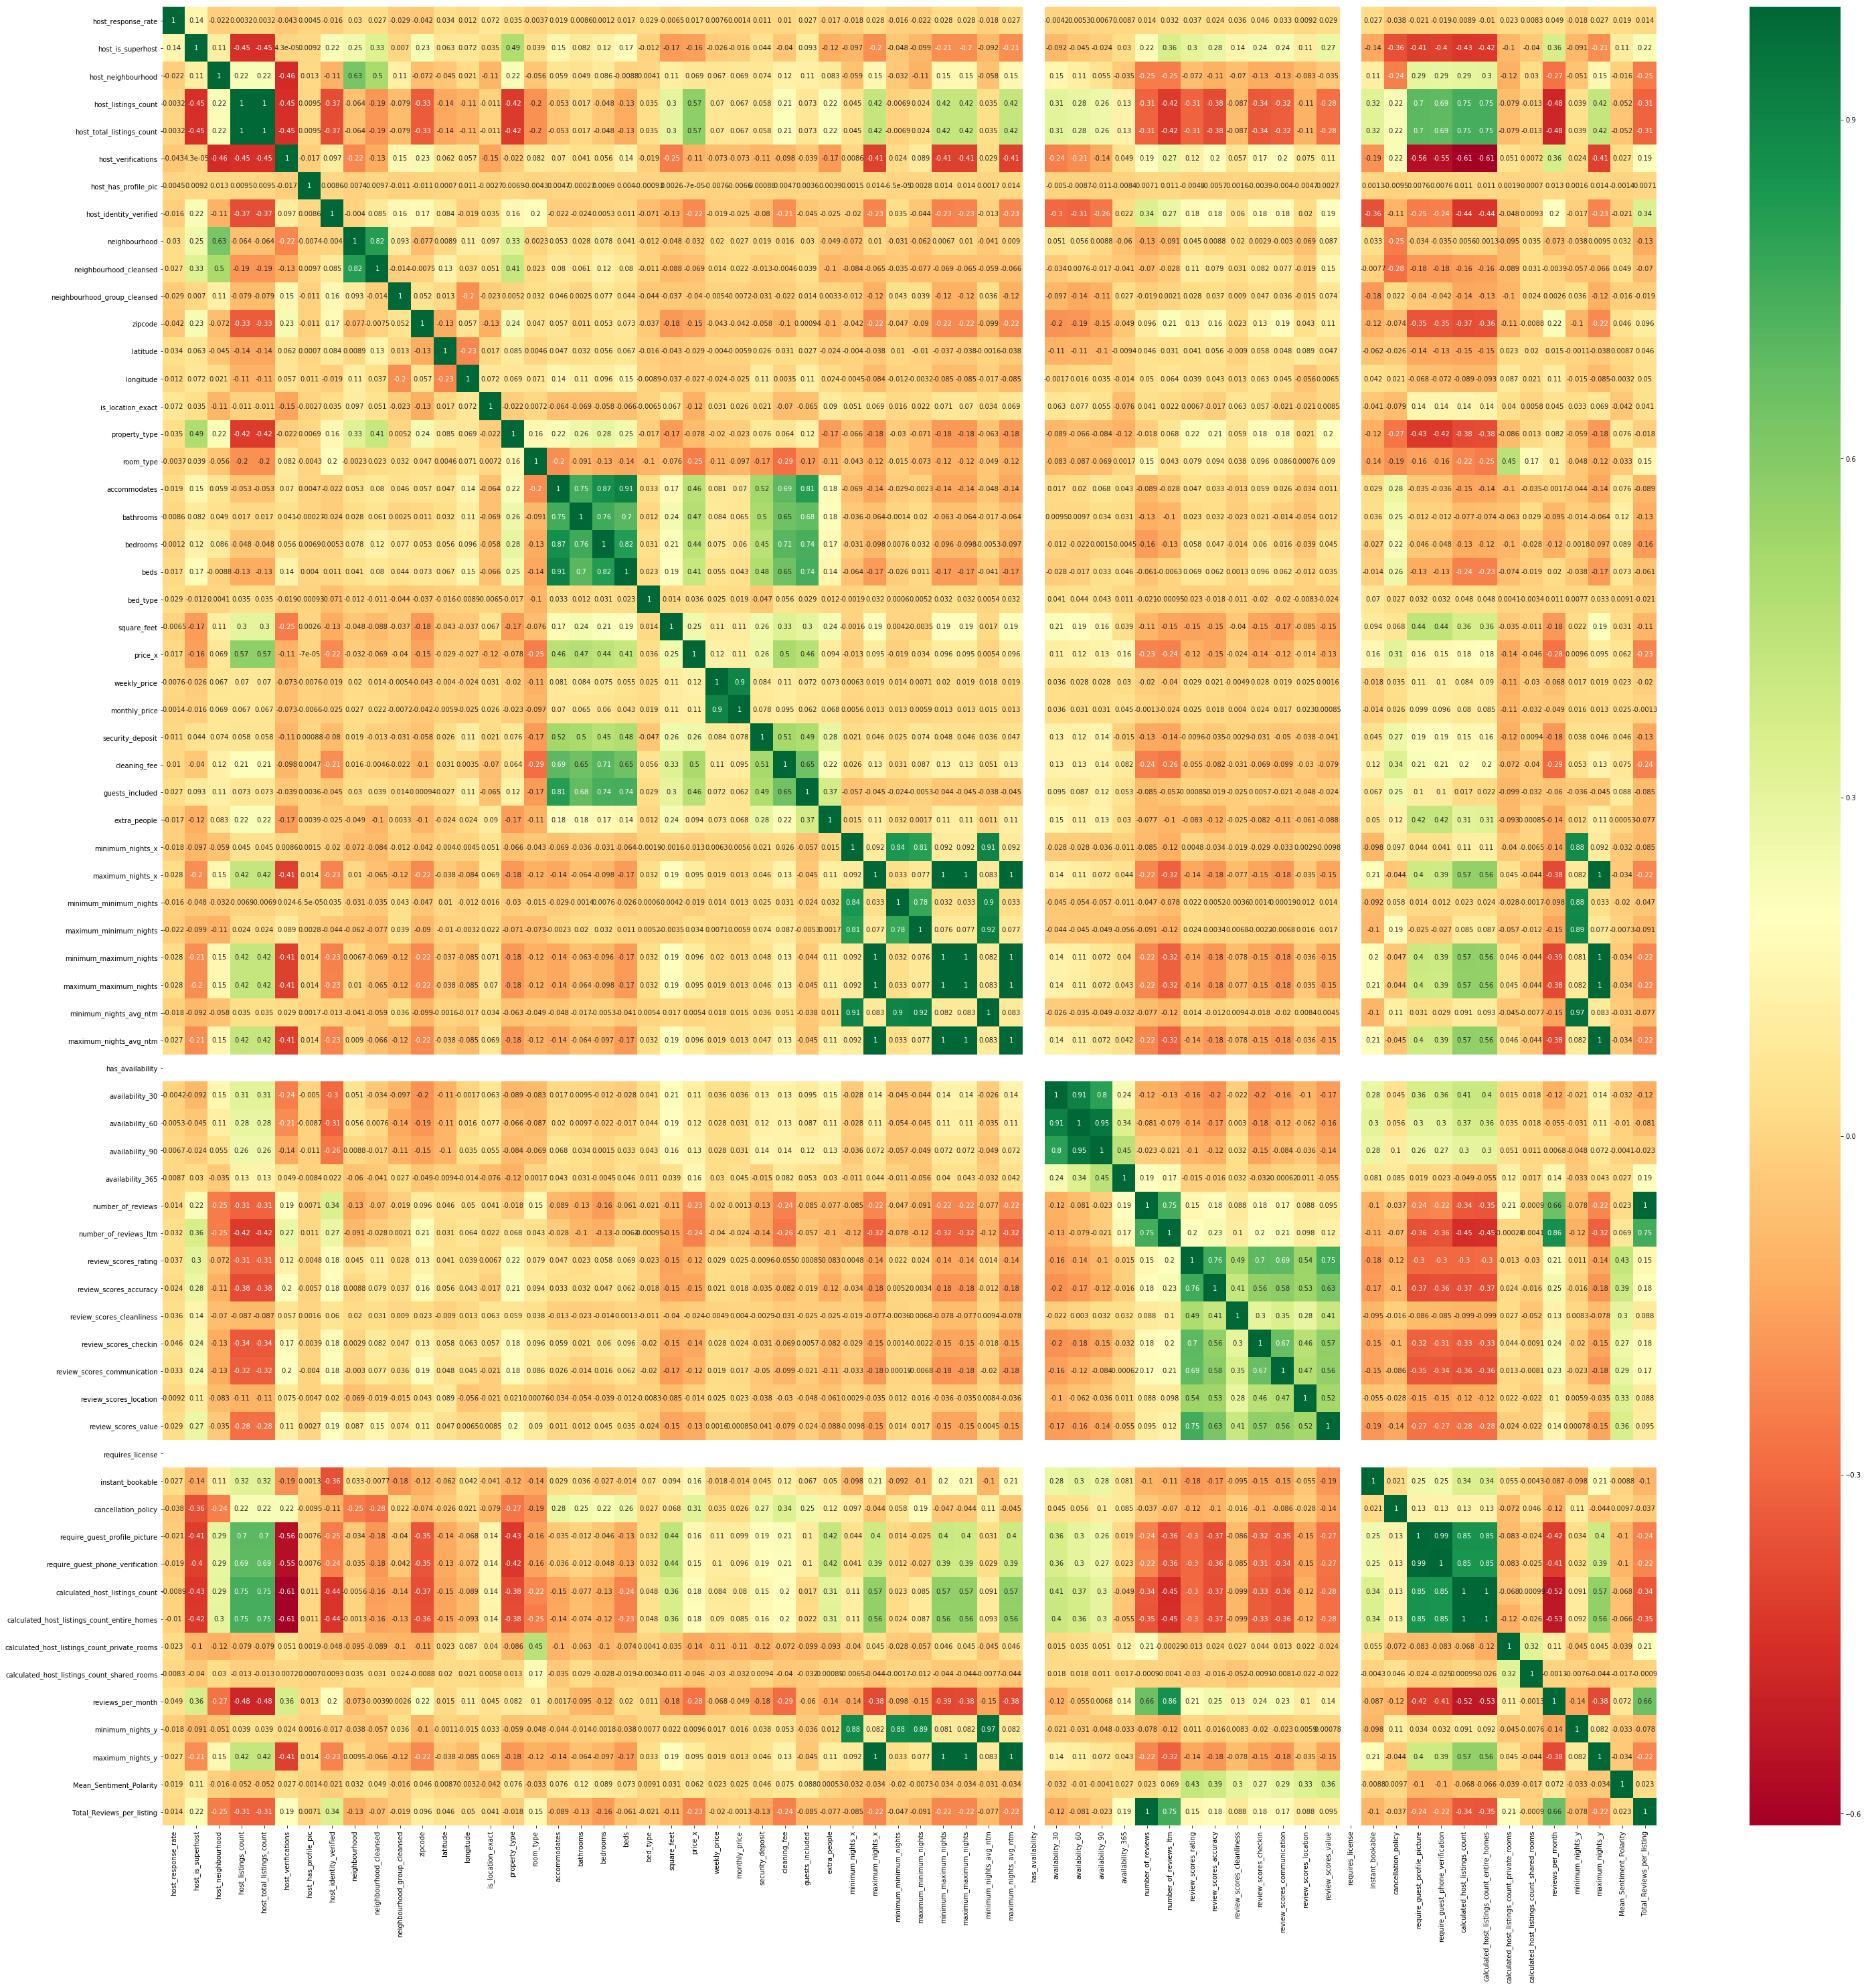

In [13]:
#plotting heatmap to find out which features are highly correlated among themselves 
import seaborn as sns

X = inputDF.iloc[:,:]
y = inputDF.loc[:,:]   
#get correlations of each features in dataset
corrmat = inputDF.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(inputDF[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
#function to drop columns which are highly correlated with each other

def filter_df_corr(inp_data, corr_val):
    
    # Creates Correlation Matrix
    if isinstance(inp_data, np.ndarray):
        inp_data = pd.DataFrame(data=inp_data)
        array_flag = True
    else:
        array_flag = False
    corr_matrix = inp_data.corr(method='spearman')

    # Iterates through Correlation Matrix Table to find correlated columns
    drop_cols = []
    n_cols = len(corr_matrix.columns)

    for i in range(n_cols):
        for k in range(i+1, n_cols):
            val = corr_matrix.iloc[k, i]
            col = corr_matrix.columns[i]
            row = corr_matrix.index[k]
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col, "|", row, "|", round(val, 2))
                drop_cols.append(col)

    # Drops the correlated columns
    drop_cols = set(drop_cols)
    inp_data = inp_data.drop(columns=drop_cols)
    # Return same type as inp
    if array_flag:
        return inp_data.values
    else:
        return inp_data

In [15]:
inputDF_BACKUP=inputDF.copy()


In [16]:
corr_df=inputDF.drop(['price_x'],axis=1) #dropping price_column

In [17]:
#dropping column having correlation > 0.6 with each other and selecting only one of them
corr_df=filter_df_corr(corr_df,0.6)

host_response_rate | host_is_superhost | 0.61
host_response_rate | host_listings_count | -0.63
host_response_rate | host_total_listings_count | -0.63
host_response_rate | calculated_host_listings_count | -0.67
host_response_rate | calculated_host_listings_count_entire_homes | -0.67
host_neighbourhood | neighbourhood | 0.63
host_listings_count | host_total_listings_count | 1.0
host_listings_count | require_guest_profile_picture | 0.64
host_listings_count | require_guest_phone_verification | 0.63
host_listings_count | calculated_host_listings_count | 0.97
host_listings_count | calculated_host_listings_count_entire_homes | 0.91
host_total_listings_count | require_guest_profile_picture | 0.64
host_total_listings_count | require_guest_phone_verification | 0.63
host_total_listings_count | calculated_host_listings_count | 0.97
host_total_listings_count | calculated_host_listings_count_entire_homes | 0.91
neighbourhood | neighbourhood_cleansed | 0.81
room_type | calculated_host_listings_count_

In [18]:
corr_df.shape

(148592, 36)

In [19]:
#dropping following column as it doesn't have much effect on price
corr_df.drop(['has_availability','requires_license'], axis=1, inplace=True) 

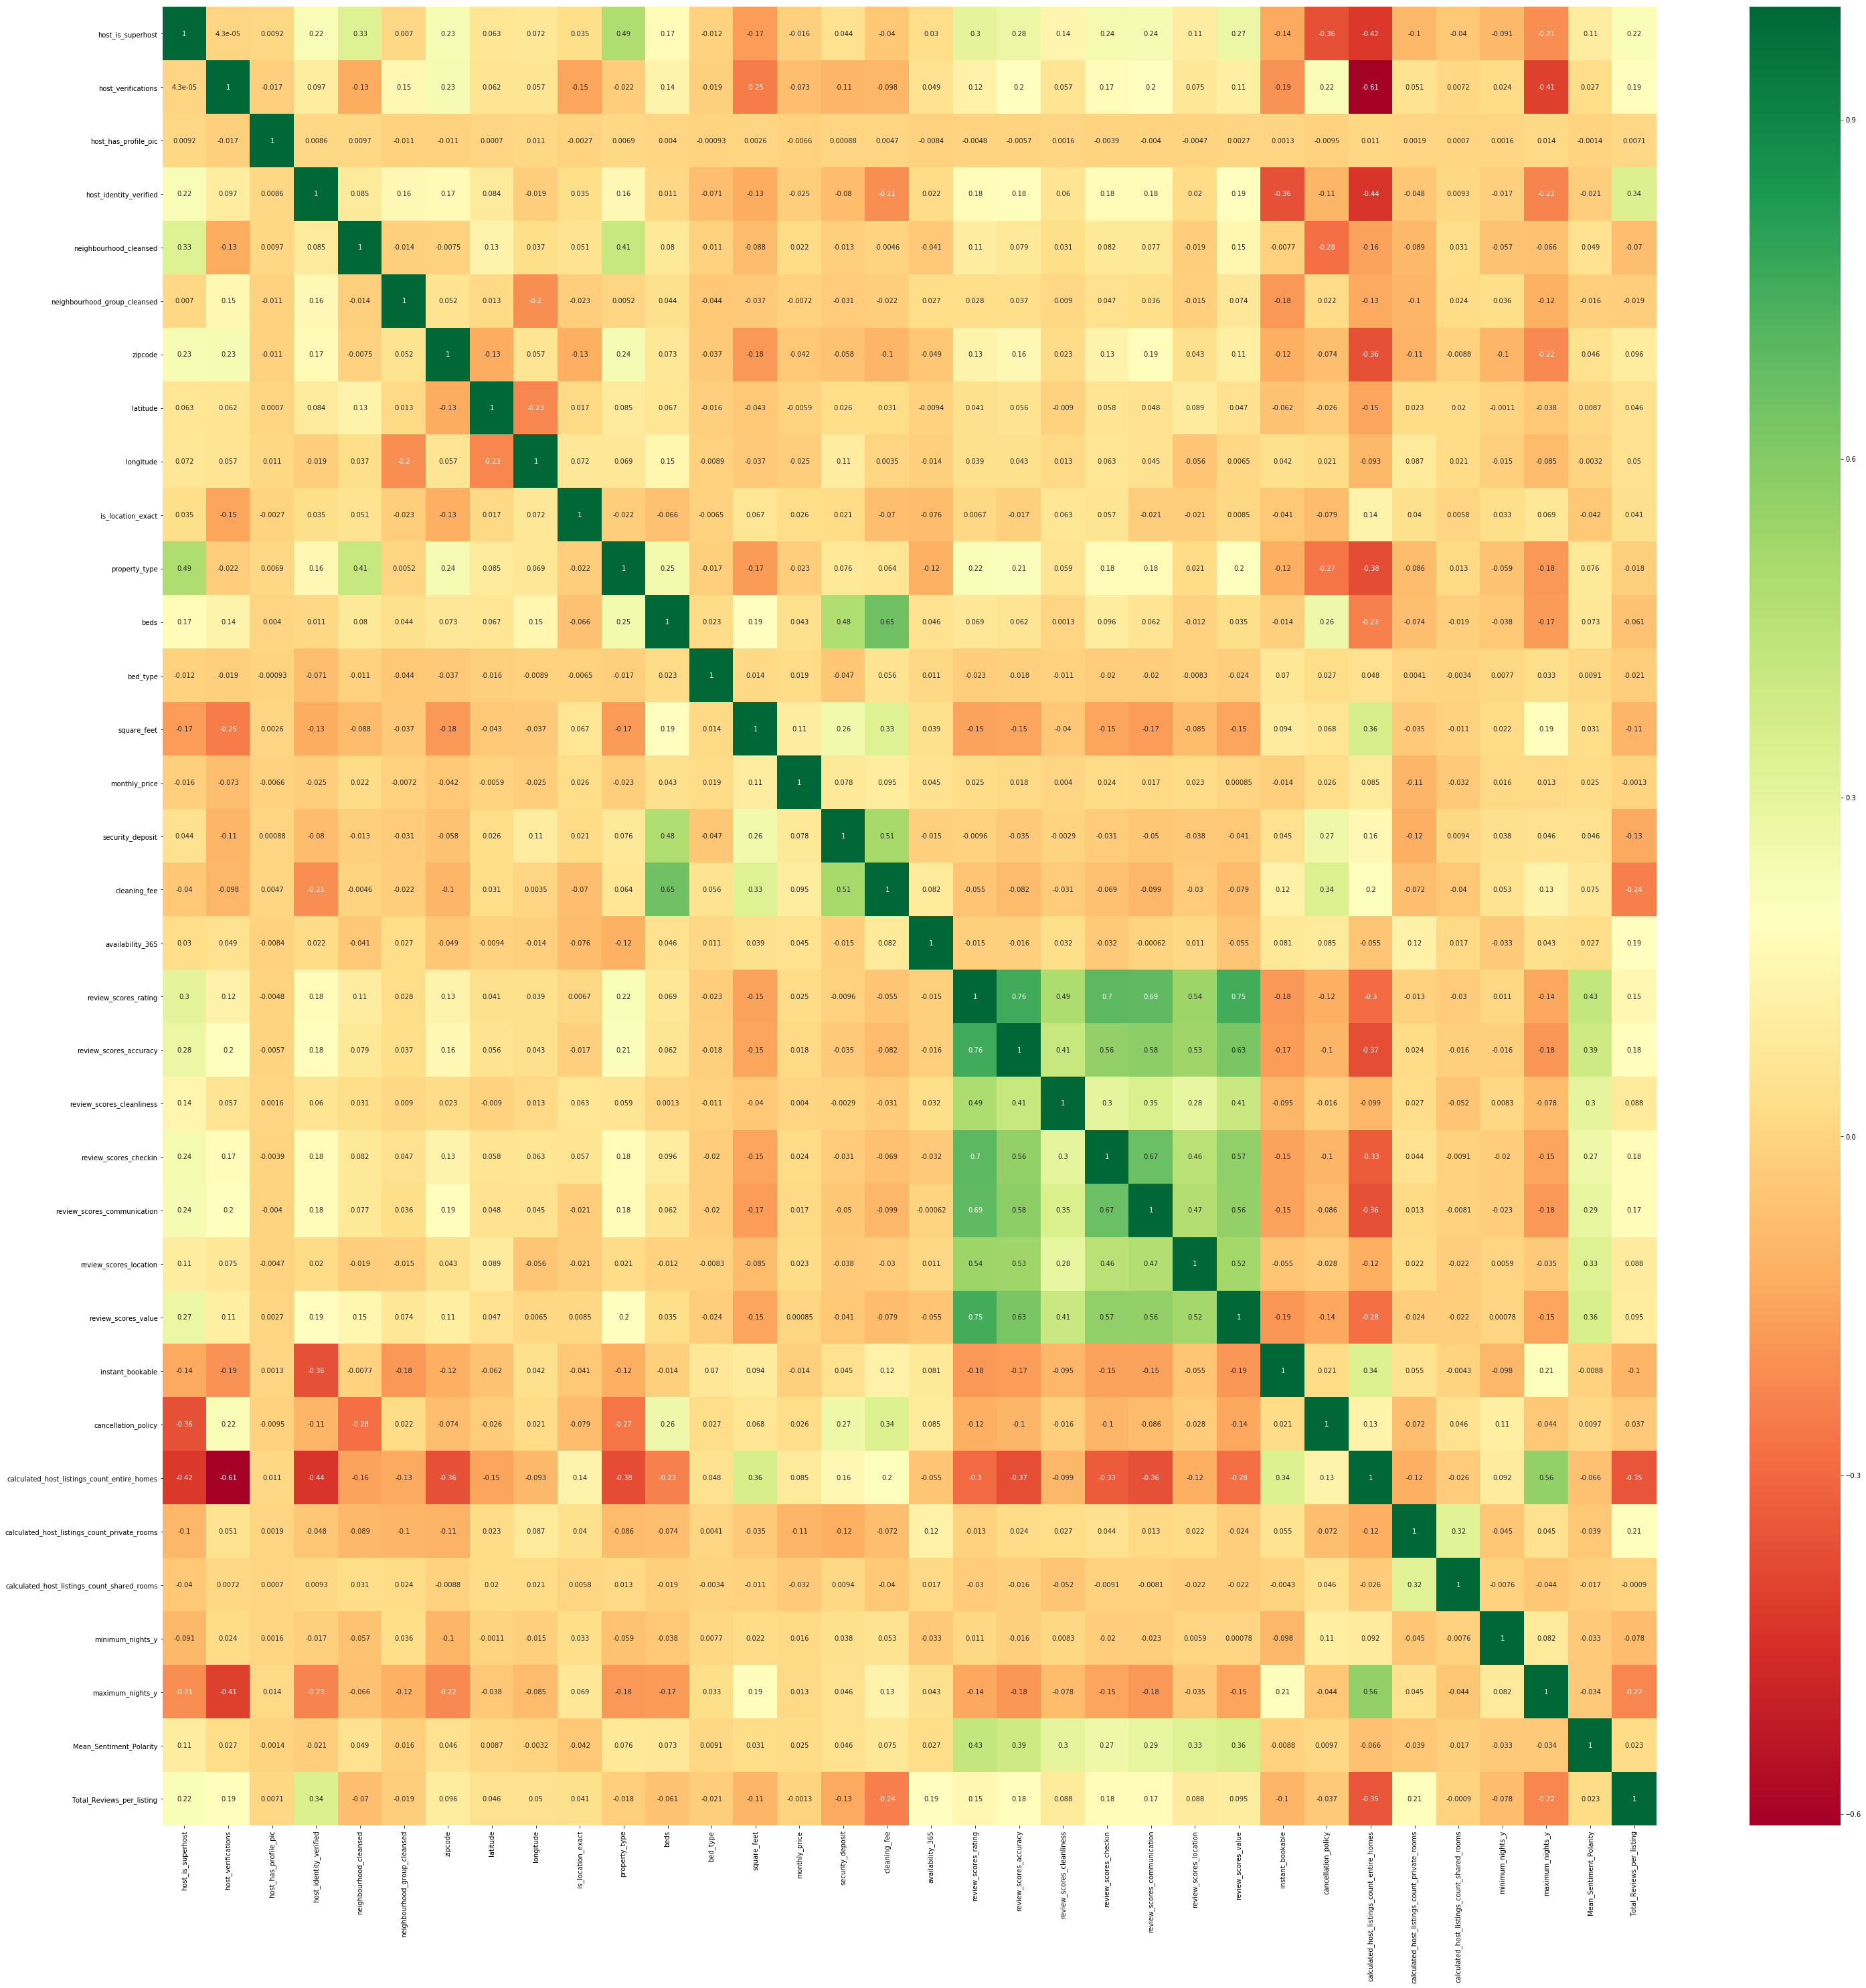

In [20]:
#heatmap after dropping correlated features

X = corr_df.iloc[:,:]
y = corr_df.loc[:,:]   
#get correlations of each features in dataset
corrmat = corr_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(inputDF[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
#adding price_column back to dataframe
corr_df['price_x'] = inputDF['price_x']

In [25]:
#using selectkbest from  sklearn.feature_selection to find the top features. 
#Its a type of univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = corr_df.iloc[:,:]
y = corr_df.loc[:,'price_x'] 

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(by=['Score'],ascending=False).head(10)  #print 10 best features

/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning:

divide by zero encountered in true_divide



,Specs,Score
34,price_x,inf
28,calculated_host_listings_count_private_rooms,1365.972801
27,calculated_host_listings_count_entire_homes,783.791917
11,beds,750.275697
16,cleaning_fee,694.867602
13,square_feet,688.369633
10,property_type,316.090181
15,security_deposit,278.003972
1,host_verifications,261.252915
0,host_is_superhost,259.748383
